In [1]:
import sys
if sys.version_info[0] < 3:
	raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io


for data_name in ["mnist", "spam", "cifar10"]:
    data = np.load(f"../data/{data_name}-data.npz")
    print("\nloaded %s data!" % data_name)
    fields = "test_data", "training_data", "training_labels"
    for field in fields:
        print(field, data[field].shape)



loaded mnist data!
test_data (10000, 1, 28, 28)
training_data (60000, 1, 28, 28)
training_labels (60000,)

loaded spam data!
test_data (1000, 32)
training_data (4172, 32)
training_labels (4172,)

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000,)


In [8]:
# Q2: Data Partitioning

# Returns indices for training_labels and training_data that are set aside for validation and for training.
def shuffle_partition(data_name, count):
    data = np.load(f"../data/{data_name}-data.npz")
    print(len(data["training_data"]))
    indices = np.arange(0, len(data["training_labels"]), 1)
    np.random.shuffle(indices)
    return indices[0:count], indices[count:]
    
# 10,000 training data set aside for validation.
mnist_validation, mnist_training = shuffle_partition("mnist", 10000)
# 20% of training data set aside for validation.
spam_validation, spam_training = shuffle_partition("spam", 834)
# 5,000 training data set aside for validation.
cifar10_validation, cifar10_training = shuffle_partition("cifar10", 5000)


60000
4172
50000


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9971]
[0.7532, 0.8164, 0.8615, 0.8798, 0.898, 0.9102, 0.9144]


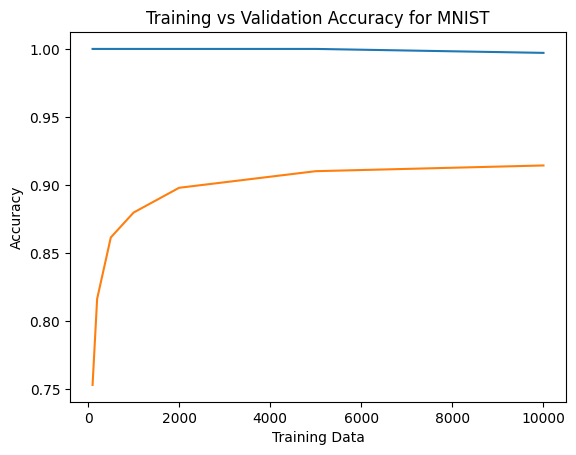

In [17]:
# Q3: Support Vector Coding
from sklearn.metrics import accuracy_score

# Trains and returns a Returns SVC Model
def train_svm(data_name, training_indices, num_train):
    clf = svm.SVC(kernel = 'linear')
    data = np.load(f"../data/{data_name}-data.npz")
    clf.fit((data["training_data"][mnist_training[:num_train]].reshape(num_train, 784)), data["training_labels"][mnist_training][:num_train])
    return clf

# Returns array of predictions using SVC Model on New Data
def predict(data_name, clf, reshape_num, lables):
    data = np.load(f"../data/{data_name}-data.npz")
    return clf.predict(data["training_data"][lables].reshape((reshape_num, 784)))

# Calculates accuracy of predictions based on known labels.
def class_accuracy(data_name, prediction, labels):
    data = np.load(f"../data/{data_name}-data.npz")
    return accuracy_score(data["training_labels"][labels], prediction)

def create_plot(num_train, training_accuracy, validation_accuracy):
    x = num_train
    y1 = training_accuracy
    y2 = validation_accuracy
    plt.title('Training vs Validation Accuracy for MNIST') 
    plt.ylabel('Accuracy') 
    plt.xlabel('Training Data')  
    plt.plot(x, y1, label = "training data")
    plt.plot(x, y2, label = "validation data") 

# Train MNIST using raw pixels as features
num_train = [100, 200, 500, 1000, 2000, 5000, 10000]
training_accuracy = []
validation_accuracy = []
for num in num_train:
    clf = train_svm("mnist", mnist_training, num)
    training_prediction = predict("mnist", clf, num, mnist_training[:num])
    training_accuracy.append(class_accuracy("mnist", training_prediction, mnist_training[:num]))
    validation_prediction = predict("mnist", clf, 10000, mnist_validation)
    validation_accuracy.append(class_accuracy("mnist", validation_prediction, mnist_validation))

create_plot(num_train, training_accuracy, validation_accuracy)    

